In [1]:
from sklearn import datasets
wine=datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [2]:
x_data=wine['data']
y_target=wine['target']

In [3]:
print(x_data.shape)
print(y_target.shape)

(178, 13)
(178,)


In [4]:
print(type(x_data))
print(type(y_target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
type(y_target[0]) #已經是數字了，所以無需轉換

numpy.int32

### 已將資料分成訓練組與測試組(80%,20%)

In [6]:
x_train=x_data[:150]
x_test=x_data[150:]
y_train=y_target[:150]
y_test=y_target[150:]

In [7]:
y_train_1=(y_train==1)
y_test_1=(y_test==1)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_1)#利用前面資料分辨是否為第一類

SGDClassifier(random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train_1) #利用前面資料分辨是否為第一類

RandomForestClassifier(random_state=42)

In [10]:
from sklearn.model_selection import cross_val_score
sgd_accuracy=cross_val_score(sgd_clf,x_train,y_train_1,cv=3,scoring='accuracy')
rf_accuracy=cross_val_score(rf_clf,x_train,y_train_1,cv=3,scoring='accuracy')
print('SGD交叉驗證三次的正確率平均數:',sgd_accuracy.mean().round(3))
print('隨機樹交叉驗證三次的正確率平均數:',rf_accuracy.mean().round(3))

SGD交叉驗證三次的正確率平均數: 0.687
隨機樹交叉驗證三次的正確率平均數: 0.827


In [11]:
from sklearn.model_selection import cross_val_predict
sgd_pred=cross_val_predict(sgd_clf,x_train,y_train_1,cv=3)
rf_pred=cross_val_predict(rf_clf,x_train,y_train_1,cv=3)
print('SGD三次預測的結果:\n',sgd_pred)
print('隨機樹三次預測的結果:\n',rf_pred)

SGD三次預測的結果:
 [False False False False  True False False False False False False False
 False False False False False False False False  True False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True False False  True
 False  True  True  True  True False  True  True False  True False  True
  True False False  True  True  True  True  True  True False False False
 False  True False False False False False  True False  True  True False
  True  True False  True False False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
隨機樹三次預測的結果:
 [False False False False False False False False False False

In [12]:
from sklearn.metrics import confusion_matrix
sgd_confusion=confusion_matrix(y_train_1,sgd_pred)
rf_confusion=confusion_matrix(y_train_1,rf_pred)
print('SGD混淆矩陣:\n',sgd_confusion)
print('隨機樹混淆矩陣:\n',rf_confusion)

SGD混淆矩陣:
 [[53 26]
 [21 50]]
隨機樹混淆矩陣:
 [[59 20]
 [ 6 65]]


In [13]:
from sklearn.metrics import f1_score
sgd_f1=f1_score(y_train_1,sgd_pred)
rf_f1=f1_score(y_train_1,rf_pred)
print('f1_score:',sgd_f1.round(3))
print('f1_score:',rf_f1.round(3))

f1_score: 0.68
f1_score: 0.833


In [14]:
sgd_score=cross_val_predict(sgd_clf,x_train,y_train_1,cv=3,method='decision_function')
rf_score=cross_val_predict(rf_clf,x_train,y_train_1,cv=3,method='predict_proba')
rf_score=rf_score[:,1]
print(rf_score)

[0.04 0.01 0.03 0.01 0.09 0.   0.01 0.01 0.01 0.06 0.   0.08 0.06 0.03
 0.03 0.   0.01 0.05 0.09 0.   0.05 0.05 0.14 0.16 0.3  0.29 0.02 0.15
 0.12 0.05 0.13 0.03 0.19 0.15 0.06 0.01 0.05 0.1  0.41 0.07 0.02 0.17
 0.   0.14 0.18 0.03 0.02 0.13 0.01 0.02 0.28 0.04 0.01 0.   0.   0.01
 0.   0.   0.06 0.65 0.62 0.34 0.42 0.86 0.95 0.59 0.5  0.74 0.48 0.94
 0.63 0.73 0.66 0.39 0.85 0.78 0.57 0.93 0.86 0.92 1.   0.62 0.99 0.32
 0.97 0.94 0.98 0.97 0.95 0.98 0.93 0.9  0.89 0.95 0.96 0.85 0.84 0.98
 0.79 0.96 0.95 0.92 0.99 1.   0.95 0.99 1.   0.99 0.99 0.79 0.88 0.99
 0.94 1.   1.   0.99 1.   0.99 0.97 1.   0.77 0.7  0.96 0.8  0.88 0.92
 0.86 0.99 1.   0.97 0.81 0.8  0.85 0.87 0.89 0.84 0.84 0.86 0.85 0.83
 0.84 0.64 0.84 0.77 0.8  0.62 0.83 0.81 0.72 0.77]


In [15]:
from sklearn.metrics import precision_recall_curve
sgd_precisoin,sgd_recall,sgd_thres=precision_recall_curve(y_train_1,sgd_score)
rf_precision,rf_recall,rf_thres=precision_recall_curve(y_train_1,rf_score)

In [16]:
import matplotlib.pyplot as plt

In [17]:
def plot_precision_recall_curve(p,r,t):
    plt.plot(t,p[:-1],'b--',label='precision') #為什麼要加[:-1]? 因為門檻值數量會比其他兩個少一個1個
    plt.plot(t,r[:-1],'g--',label='recall')
    plt.xlabel('threshold')
    plt.grid()
    plt.legend()

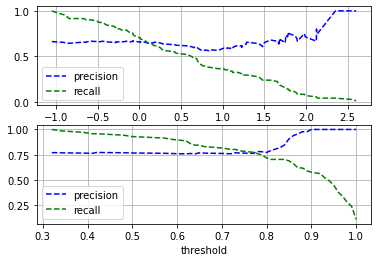

In [18]:
plt.subplot(211)
plot_precision_recall_curve(sgd_precisoin,sgd_recall,sgd_thres)
plt.subplot(212)
plot_precision_recall_curve(rf_precision,rf_recall,rf_thres)

In [19]:
from sklearn.metrics import roc_curve
sgd_fpr,sgd_tpr,sgd_thres_roc=roc_curve(y_train_1,sgd_score)
rf_fpr,rf_tpr,rf_thres_roc=roc_curve(y_train_1,rf_score)

In [20]:
from sklearn.metrics import roc_auc_score
sgd_auc=roc_auc_score(y_train_1,sgd_score)
rf_auc=roc_auc_score(y_train_1,rf_score)

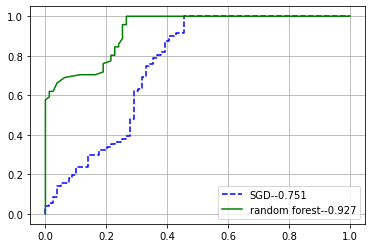

In [21]:
plt.plot(sgd_fpr,sgd_tpr,'b--',label='SGD--%s'%(sgd_auc).round(3))
plt.plot(rf_fpr,rf_tpr,'g',label='random forest--%s'%(rf_auc).round(3))
plt.grid()
plt.legend()